# Data Acquisition System

**Author: Chul Min Yeum**  
**Email: cmyeum@uwaterloo.ca**  

Last updated: 2023-12-28

**Table of Contents**
* Sampling
* Time Signal in a Frequency Domain
* Aliasing
* Spatial Aliasing
* Oversampling
* Quantization
* Clipping

## Sampling

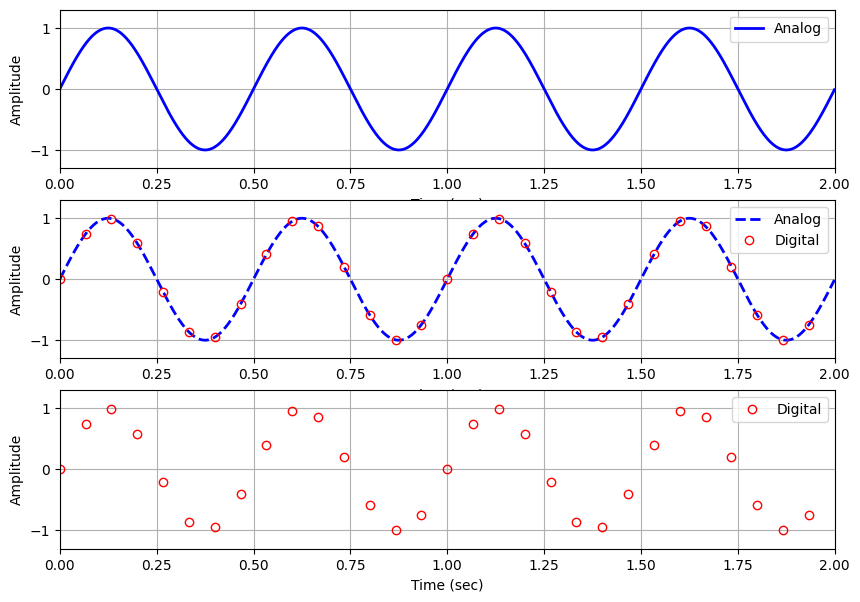

In [2]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from IPython.display import display

t = sym.Symbol('t')

f = 2
y = sym.sin(2*sym.pi*f*t) # sin(2pift) - analytical signal


fig1 = plt.figure(figsize=(10, 7))

# this signal is assumed to be analog, which means very high sampling rate
ncycle = 2
Fsa = 1000 # # of samples per a second
ta = np.arange(0, ncycle, 1/Fsa)
ya = sym.lambdify(t, y, "numpy")(ta)

# analog signal
plt.subplot(3, 1, 1)
plt.plot(ta, ya, 'b', linewidth=2, label='Analog')
plt.xlabel('Time (sec)'); 
plt.ylabel('Amplitude')
plt.legend(loc='best')
plt.xlim([0, 2]); 
plt.ylim([-1.3, 1.3])
plt.grid()

# analog and digital signals
Fsd = 15 # # of samples per a second
td = np.arange(0, ncycle, 1/Fsd)
yd = sym.lambdify(t, y, "numpy")(td)

plt.subplot(3, 1, 2)
plt.plot(ta, ya, '--b', linewidth=2, label='Analog')
plt.plot(td, yd, 'or', linewidth=2, label='Digital', markerfacecolor='none')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.legend(loc='best')
plt.xlim([0, 2]);
plt.ylim([-1.3, 1.3])
plt.grid()

# only digital signals
plt.subplot(3, 1, 3)
plt.plot(td, yd, 'or', linewidth=2, label='Digital', markerfacecolor='none')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.legend(loc='best')
plt.xlim([0, 2]);
plt.ylim([-1.3, 1.3])
plt.grid()

## Time Signal in a Frequency Domain

$y_1 = sin(2 \pi f_1t)$  
$y_2 = sin(2 \pi f_1t) + sin(2 \pi f_2t) $  
$y_3 = sin(2 \pi f_1t) + sin(2 \pi f_2t) + sin(2 \pi f_3t)$  

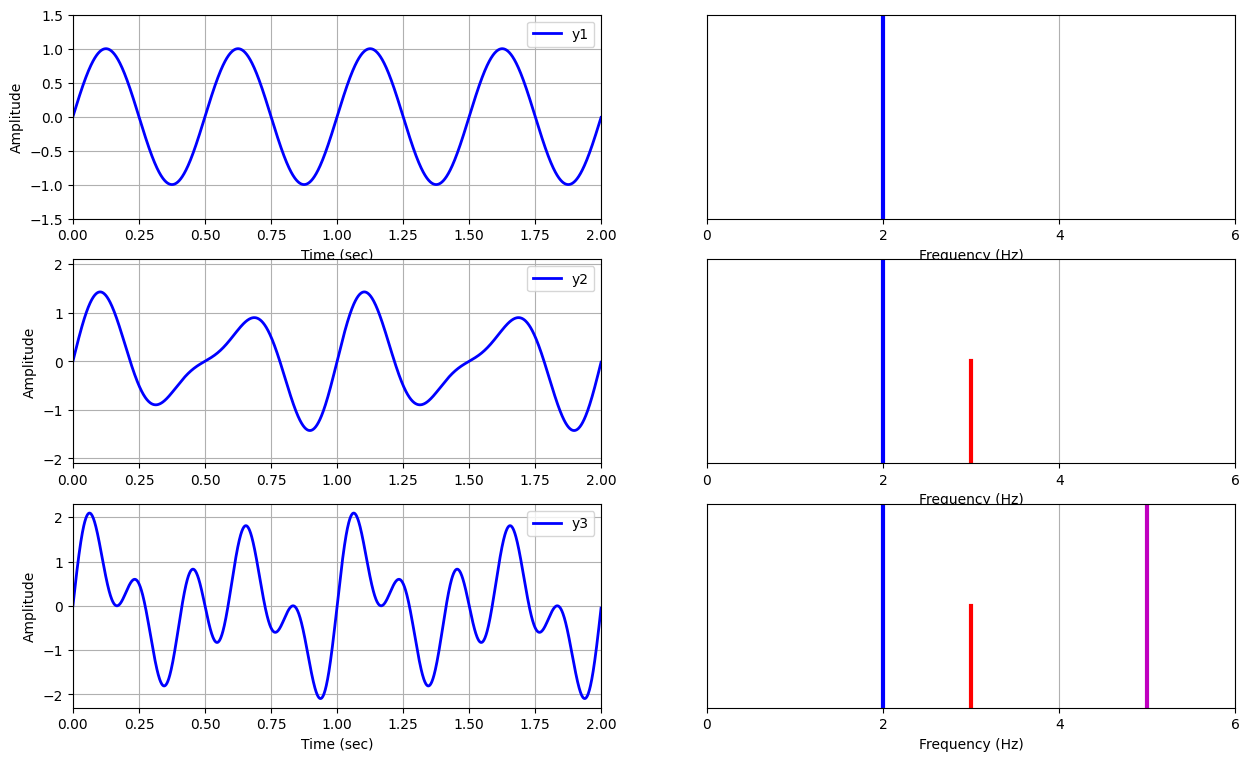

In [5]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from IPython.display import display

t = sym.Symbol('t')

f1 = 2; y1 = sym.sin(2*sym.pi*f1*t) 
f2 = 3; y2 = y1 + 0.5*sym.sin(2*sym.pi*f2*t) 
f3 = 5; y3 = y2 + sym.sin(2*sym.pi*f3*t) 

ncycle = 2
Fsa = 1000 # # of samples per a second
ta = np.arange(0, ncycle, 1/Fsa)

ya1 = sym.lambdify(t, y1, "numpy")(ta)
ya2 = sym.lambdify(t, y2, "numpy")(ta)
ya3 = sym.lambdify(t, y3, "numpy")(ta)

fig1 = plt.figure(figsize=(15, 9))

# y1 signal
plt.subplot(3, 2, 1)
plt.plot(ta, ya1, 'b', linewidth=2, label='y1')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.legend(loc=1)
plt.xlim([0, 2])
plt.ylim([-1.5, 1.5])
plt.grid()

plt.subplot(3, 2, 2)
plt.plot([f1, f1], [0, 1], 'b', linewidth=3)
plt.ylim([0, 1])
plt.yticks([])
plt.xticks([0, 2, 4, 6])
plt.xlabel('Frequency (Hz)')
plt.grid()

# y2 signal
plt.subplot(3, 2, 3)
plt.plot(ta, ya2, 'b', linewidth=2, label='y2')
plt.ylabel('Amplitude')
plt.legend(loc='best')
plt.xlim([0, 2])
plt.ylim([-2.1, 2.1])
plt.grid()

plt.subplot(3, 2, 4)
plt.plot([f1, f1], [0, 1], 'b', linewidth=3)
plt.plot([f2, f2], [0, 0.5], 'r', linewidth=3)
plt.ylim([0, 1])
plt.yticks([])
plt.xticks([0, 2, 4, 6])
plt.xlabel('Frequency (Hz)')
plt.grid()

# y3 signal
plt.subplot(3, 2, 5)
plt.plot(ta, ya3, 'b', linewidth=2, label='y3')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.legend(loc='best')
plt.xlim([0, 2])
plt.ylim([-2.3, 2.3])
plt.grid()

plt.subplot(3, 2, 6)
plt.plot([f1, f1], [0, 1], 'b', linewidth=3)
plt.plot([f2, f2], [0, 0.5], 'r', linewidth=3)
plt.plot([f3, f3], [0, 1], 'm', linewidth=3)
plt.ylim([0, 1])
plt.yticks([])
plt.xticks([0, 2, 4, 6])
plt.xlabel('Frequency (Hz)')
plt.grid()



## Aliasing

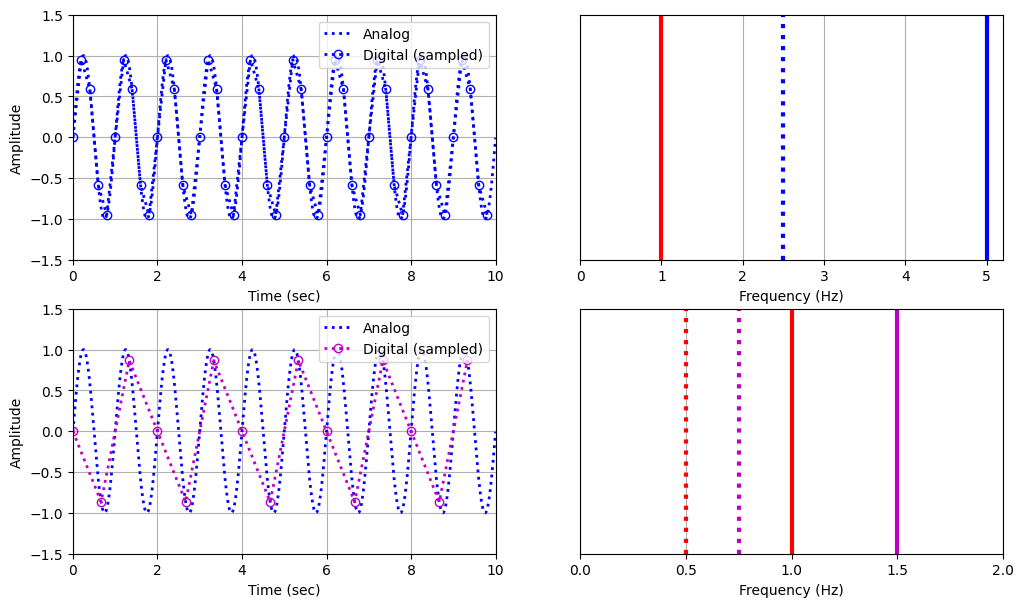

In [6]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from IPython.display import display

t = sym.Symbol('t')

f = 1; 
y = sym.sin(2*sym.pi*f*t) 

# this signal is assumed to be analog 
ncycle = 10
Fsa = 1000 # # of samples per a second
ta = np.arange(0, ncycle, 1/Fsa)
ya = sym.lambdify(t, y, "numpy")(ta)


fig1 = plt.figure(figsize=(12, 7))

# signal 1
# sampling frequency = 5Hz
Fs1 = 5 # 5 Hz
td1 = np.arange(0, ncycle, 1/Fs1)
yd1 = sym.lambdify(t, y, "numpy")(td1)

plt.subplot(2, 2, 1)
plt.plot(ta, ya, ':b', linewidth=2, label='Analog')
plt.plot(td1, yd1, 'o:b', linewidth=2, label='Digital (sampled)', markerfacecolor='none')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.legend(loc=1)
plt.xlim([0, 10])
plt.ylim([-1.5, 1.5])
plt.grid()

plt.subplot(2, 2, 2)
plt.plot([f, f], [0, 1], 'r', linewidth=3)
plt.plot([Fs1, Fs1], [0, 1], 'b', linewidth=3) 
plt.plot([Fs1/2, Fs1/2], [0, 1], ':b', linewidth=3) # nyquist frequency
plt.ylim([0, 1])
plt.yticks([])
plt.xticks(range(0, 6))
plt.xlabel('Frequency (Hz)')
plt.grid()

# signal 2
# sampling frequency = 1.5Hz
Fs2 = 1.5 # 1.5 Hz
td2 = np.arange(0, ncycle, 1/Fs2)
yd2 = sym.lambdify(t, y, "numpy")(td2)

plt.subplot(2, 2, 3)
plt.plot(ta, ya, ':b', linewidth=2, label='Analog')
plt.plot(td2, yd2, 'o:m', linewidth=2, label='Digital (sampled)', markerfacecolor='none')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.legend(loc=1)
plt.xlim([0, 10])
plt.ylim([-1.5, 1.5])
plt.grid()

plt.subplot(2, 2, 4)
plt.plot([f, f], [0, 1], 'r', linewidth=3)
plt.plot([Fs2, Fs2], [0, 1], 'm', linewidth=3)
plt.plot([Fs2/2, Fs2/2], [0, 1], ':m', linewidth=3) # nyquist frequency

# attention!: aliased frequency
f_samp = Fs2/2 - abs(f-Fs2/2)
plt.plot([f_samp, f_samp], [0, 1], ':r', linewidth=3)

plt.ylim([0, 1])
plt.yticks([])
plt.xticks(np.arange(0, 2.1, 0.5))
plt.xlabel('Frequency (Hz)')
plt.grid()


## Spatial Aliasing

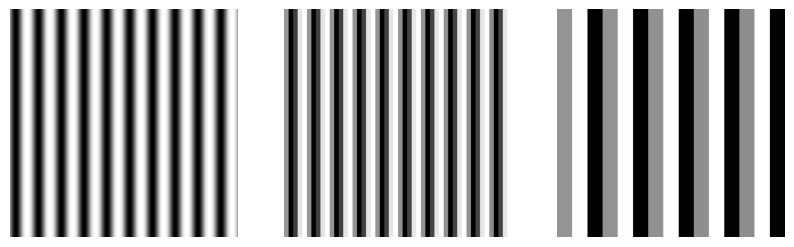

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import matlib

nCycle = 10
orgFreq = 120 # 120 Hz

x = np.linspace(0, nCycle, nCycle*orgFreq)

f = 1
sig = np.sin(2*np.pi*f*x)
img = (np.matlib.repmat(sig, nCycle*orgFreq, 1) + 1) /2 # no special meaning to set nCycle*orgFreq here. It just makes an square image. 

# case 1: sampling with 5Hz. Sig1 is sampled with 120 Hz so picking every (orgFreq/5 = 24) point is the sampling with 5Hz
fs1 = 5 # 5Hz 
sig1 = sig[::int(orgFreq/fs1)] 
sig1 = np.repeat(sig1, orgFreq/fs1) # repeating the same value element for visualization 
img1 = (np.matlib.repmat(sig1, nCycle*orgFreq, 1) + 1) /2 # no special meaning to set nCycle*orgFreq here. It just makes an square image. 

# case 2: sampling with 1.5Hz. Sig1 is sampled with 120 Hz so picking every (orgFreq/1.5 = 80) point is the sampling with 1.5Hz
fs2 = 1.5
sig2 = sig[::int(orgFreq/fs2)] 
sig2 = np.repeat(sig2, orgFreq/fs2) # repeating the same value element for visualization 
img2 = (np.matlib.repmat(sig2, nCycle*orgFreq, 1) + 1) /2 # no special meaning to set nCycle*orgFreq here. It just makes an square image. 

fig = plt.figure(figsize=(10, 7))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='Greys'); plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img1, cmap='Greys'); plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img2, cmap='Greys'); plt.axis('off')
plt.show()

## Oversampling

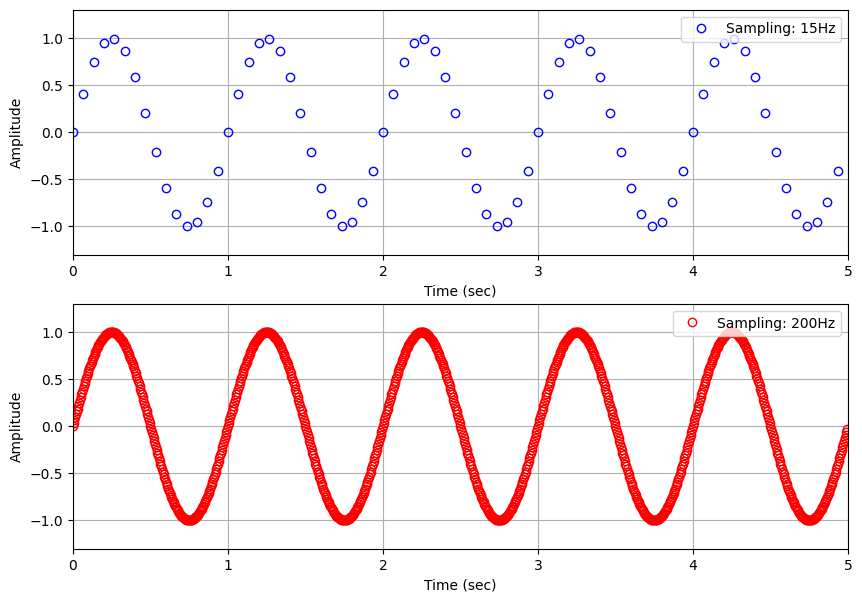

In [12]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from IPython.display import display

t = sym.Symbol('t')

f = 1
y = sym.sin(2*sym.pi*f*t) # sin(2pift)

fig = plt.figure(figsize=(10, 7))

# case 1: reasonable sampling rate
ncycle = 5
Fsd1 = 15 # 15Hz
td1 = np.arange(0, ncycle, 1/Fsd1)
yd1 = sym.lambdify(t, y, "numpy")(td1)

plt.subplot(2, 1, 1)
plt.plot(td1, yd1, 'ob', linewidth=2, label='Sampling: 15Hz', markerfacecolor='none')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.legend(loc='best')
plt.xlim([0, 5])
plt.ylim([-1.3, 1.3])
plt.grid()

# case 2: very (excessively) high sampling rate
ncycle = 5
Fsd2 = 200 # 15Hz
td2 = np.arange(0, ncycle, 1/Fsd2)
yd2 = sym.lambdify(t, y, "numpy")(td2)

plt.subplot(2, 1, 2)
plt.plot(td2, yd2, 'or', linewidth=2, label='Sampling: 200Hz', markerfacecolor='none')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.legend(loc=1)
plt.xlim([0, 5])
plt.ylim([-1.3, 1.3])
plt.grid()

## Quantization

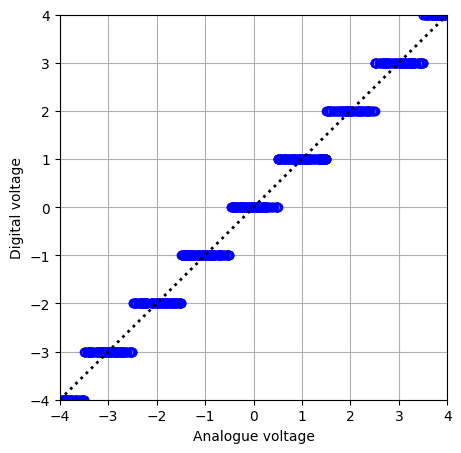

In [16]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

from IPython.display import display
from scipy import interpolate

# 3bit A/D converter

sig = np.random.uniform(-4, 4, size=(1000, 1))

f = interpolate.interp1d(np.arange(-4,5), np.arange(-4,5), kind='nearest')
sig_digit = f(sig) # digitized signal

fig = plt.figure(figsize=(5, 5))

# y1 signal
plt.plot(sig, sig_digit, 'ob', linewidth=2, markerfacecolor='none')
plt.plot(np.arange(-4, 5), np.arange(-4, 5), ':k', linewidth=2)
plt.xlabel('Analogue voltage')
plt.ylabel('Digital voltage')
plt.xticks(range(-4, 5))
plt.xticks(range(-4, 5))
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.grid()
plt.show()

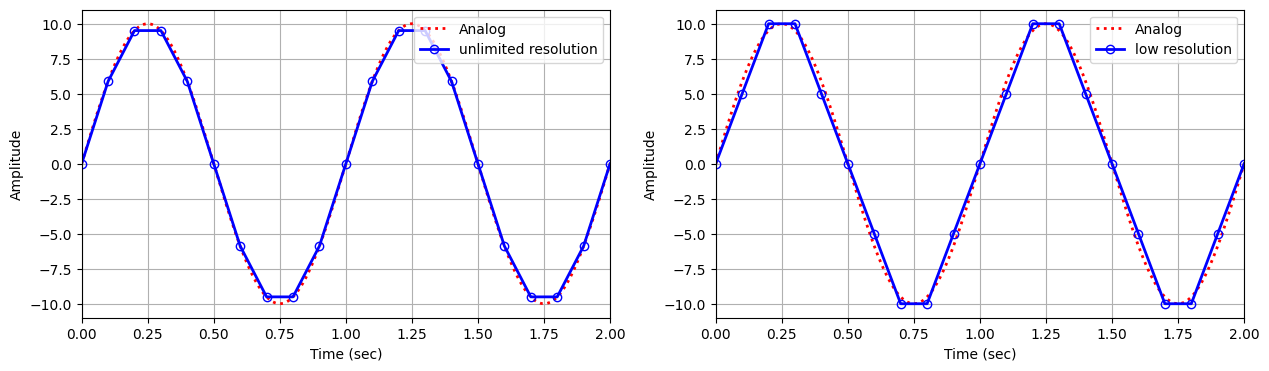

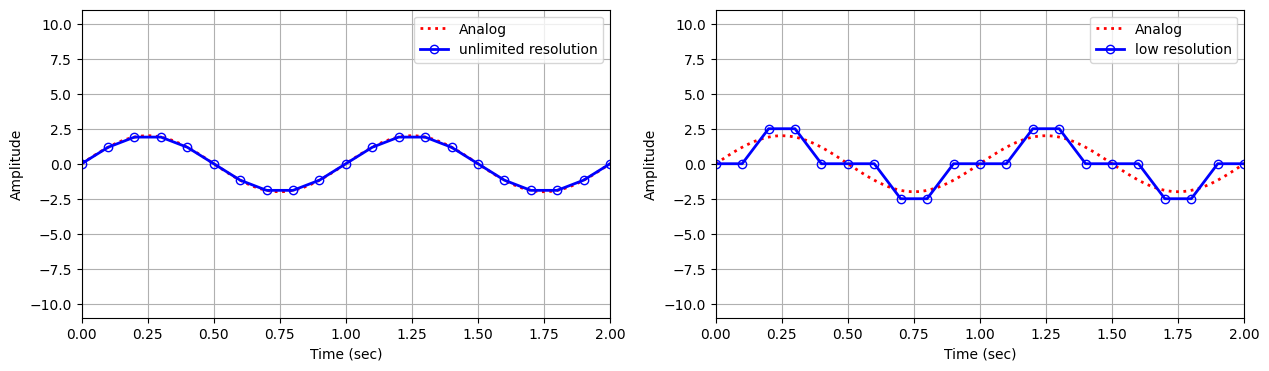

In [20]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from IPython.display import display

t = sym.Symbol('t')

fig1 = plt.figure(figsize=(15, 4))

f = 1 
ampt = 10 #amplitude
y = sym.sin(2*sym.pi*f*t) * ampt

# ya: assumed to be an analog signal
ncycle = 2
Fsa = 1000 
ta = np.arange(0, ncycle+1/Fsa, 1/Fsa)
ya = sym.lambdify(t, y, "numpy")(ta)

# yd1: digitized signal with unlimited resolution in y axis
Fsd1 = 10 
td1 = np.arange(0, ncycle+1/Fsd1, 1/Fsd1)
yd1 = sym.lambdify(t, y, "numpy")(td1)

plt.subplot(1, 2, 1)
plt.plot(ta, ya, ':r', linewidth=2, label='Analog')
plt.plot(td1, yd1, '-ob', linewidth=2, label='unlimited resolution', markerfacecolor='none' )
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.legend(loc=1)
plt.xlim([0, 2])
plt.ylim([-11, 11])
plt.grid()

# yd1_low: digitized signal with very low resolution in y axis
f = interpolate.interp1d(np.arange(-10,11,2.5), np.arange(-10,11,2.5), kind='nearest')
yd1_low = f(yd1) # digitized signal

plt.subplot(1, 2, 2)
plt.plot(ta, ya, ':r', linewidth=2, label='Analog')
plt.plot(td1, yd1_low, '-ob', linewidth=2, label='low resolution', markerfacecolor='none' )
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.legend(loc=1)
plt.xlim([0, 2])
plt.ylim([-11, 11])
plt.grid()


# The graph looks worse
fig2 = plt.figure(figsize=(15, 4))

f = 1 
ampt = 2 # small amplitude
y = sym.sin(2*sym.pi*f*t) * ampt

# ya: assumed to be an analog signal
ncycle = 2
Fsa = 1000 
ta = np.arange(0, ncycle+1/Fsa, 1/Fsa)
ya = sym.lambdify(t, y, "numpy")(ta)

# yd2: digitized signal with unlimited resolution
Fsd2 = 10 
td2 = np.arange(0, ncycle+1/Fsd1, 1/Fsd1)
yd2 = sym.lambdify(t, y, "numpy")(td1)

plt.subplot(1, 2, 1)
plt.plot(ta, ya, ':r', linewidth=2, label='Analog')
plt.plot(td2, yd2, '-ob', linewidth=2, label='unlimited resolution', markerfacecolor='none' )
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.legend(loc=1)
plt.xlim([0, 2])
plt.ylim([-11, 11])
plt.grid()

# yd1_low: digitized signal with very low resolution
f = interpolate.interp1d(np.arange(-10,11,2.5), np.arange(-10,11,2.5), kind='nearest')
yd2_low = f(yd2) # digitized signal

plt.subplot(1, 2, 2)
plt.plot(ta, ya, ':r', linewidth=2, label='Analog')
plt.plot(td2, yd2_low, '-ob', linewidth=2, label='low resolution', markerfacecolor='none' )
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.legend(loc=1)
plt.xlim([0, 2])
plt.ylim([-11, 11])
plt.grid()


## Clipping

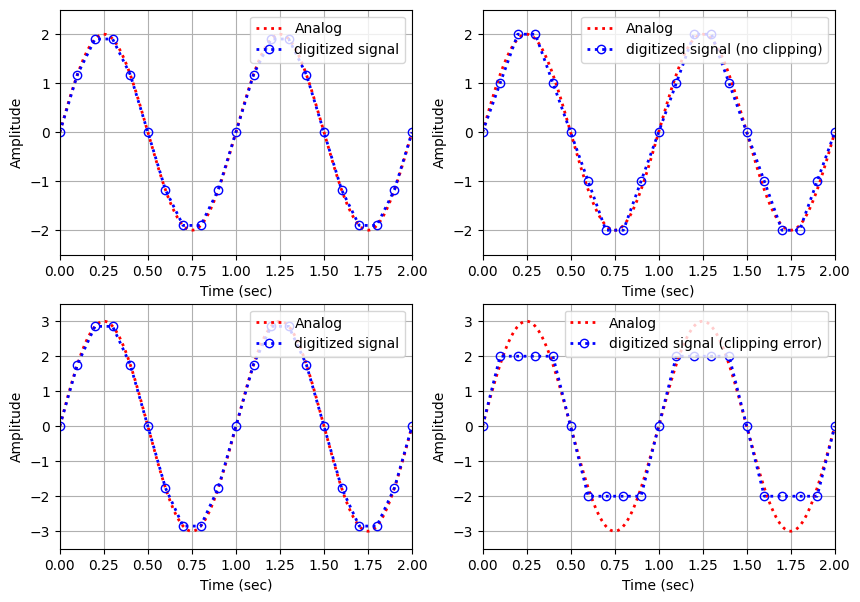

In [21]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from IPython.display import display

t = sym.Symbol('t')

f = 1
ampt = 2
y = sym.sin(2*sym.pi*f*t) * ampt# sin(2pift)

# this signal is assumed to be analog 
ncycle = 2
Fsa = 1000 # # of samples per a second
ta = np.arange(0, ncycle+1/Fsa, 1/Fsa)
ya = sym.lambdify(t, y, "numpy")(ta)

Fsd1 = 10 # 10Hz
td1 = np.arange(0, ncycle+1/Fsd1, 1/Fsd1)
yd1 = sym.lambdify(t, y, "numpy")(td1)

fig = plt.figure(figsize=(10, 7))

plt.subplot(2, 2, 1)
plt.plot(ta, ya, ':r', linewidth=2, label='Analog')
plt.plot(td1, yd1, 'o:b', linewidth=2, label='digitized signal', markerfacecolor='none')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.legend(loc=1)
plt.xlim([0, 2])
plt.ylim([-2.5, 2.5])
plt.grid()

# 8 bit ADC (-2v ~ 2v)
resol = 4/8 # resolution
f = interpolate.interp1d(np.arange(-2,2+resol,resol), np.arange(-2,2+resol,resol), kind='nearest')
yd1_quant = f(yd1)

plt.subplot(2, 2, 2)
plt.plot(ta, ya, ':r', linewidth=2, label='Analog')
plt.plot(td1, yd1_quant, 'o:b', linewidth=2, label='digitized signal (no clipping)', markerfacecolor='none')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.legend(loc=1)
plt.xlim([0, 2])
plt.ylim([-2.5, 2.5])
plt.grid()

# if the amplitdue is higher than 2v and lower than -2v
ya = ya * 1.5 # -3v~3v
yd1 = yd1 * 1.5 # -3v~3v

plt.subplot(2, 2, 3)
plt.plot(ta, ya, ':r', linewidth=2, label='Analog')
plt.plot(td1, yd1, 'o:b', linewidth=2, label='digitized signal', markerfacecolor='none')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.legend(loc=1)
plt.xlim([0, 2])
plt.ylim([-3.5, 3.5])
plt.grid()

# 8 bit ADC (-2v ~ 2v)
f = interpolate.interp1d(np.r_[ -3, np.arange(-2,2+resol,resol), 3], np.r_[-2, np.arange(-2,2+resol,resol), 2], kind='nearest')
yd1_quant = f(yd1)

plt.subplot(2, 2, 4)
plt.plot(ta, ya, ':r', linewidth=2, label='Analog')
plt.plot(td1, yd1_quant, 'o:b', linewidth=2, label='digitized signal (clipping error)', markerfacecolor='none')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.legend(loc=1)
plt.xlim([0, 2])
plt.ylim([-3.5, 3.5])
plt.grid()

## Demo: Vibration Measurement Using Smart Phones

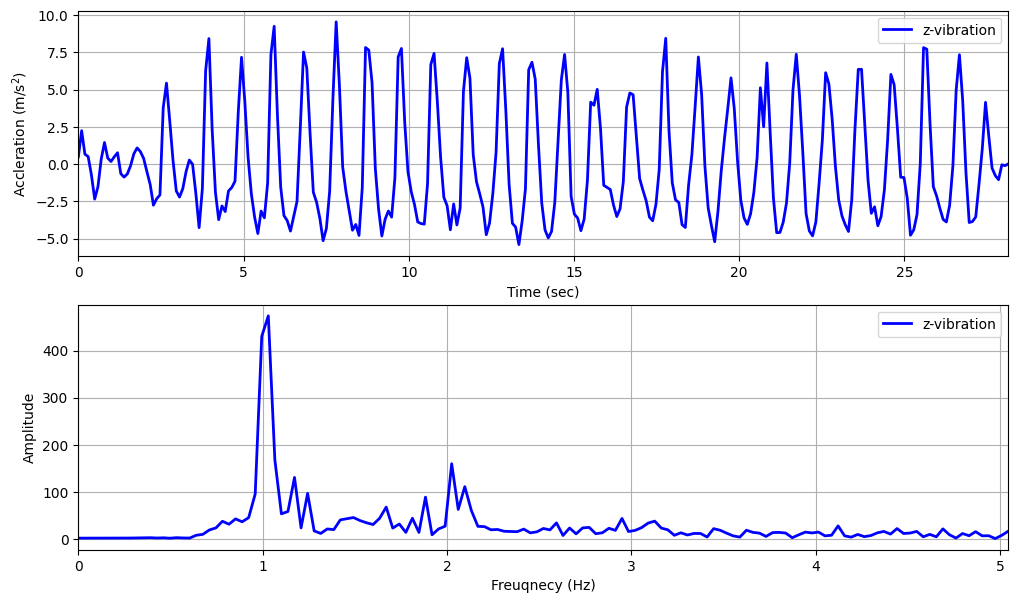

In [22]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import scipy.io

from IPython.display import display
from IPython import get_ipython

if 'google.colab' in str(get_ipython()):
   base = r'https://raw.githubusercontent.com/chulminy/CIVE497-CIVE700/master/'
   folder = r'notebook/data_aquisition/'
   file = 'vibration_1Hz.mat'
   !wget -q {base+folder+file}

mat_file = scipy.io.loadmat('vibration_1Hz.mat')

time = mat_file['time'].flatten()
zvib = mat_file['zvib'].flatten()

fs = len(time)/time[-1]; # sampling frequency

fig = plt.figure(figsize=(12, 7))

plt.subplot(2, 1, 1)
plt.plot(time, zvib, 'b', linewidth=2, label='z-vibration')
plt.xlabel('Time (sec)')
plt.ylabel('Accleration (m/s$^2$)')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(loc=1)
plt.grid()

# fft of zvib
nfft = len(zvib)

Y = np.abs(np.fft.fft(zvib))
xfreq = np.arange(0, fs/2, fs/nfft)

plt.subplot(2, 1, 2)
plt.plot(xfreq, Y[0:round(nfft/2)], 'b', linewidth=2, label='z-vibration')
plt.xlabel('Freuqnecy (Hz)')
plt.ylabel('Amplitude')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend(loc=1)
plt.grid()
